<a href="https://colab.research.google.com/github/tariqzahratahdi/DataScience/blob/main/course_seaborn_visualizing_statistical_relationships_fr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualiser les relations statistiques

In [ ]:
# import seaborn
import seaborn as sns

# set seaborn theme
sns.set_theme(style="darkgrid")

L'analyse statistique est un processus permettant de comprendre les relations entre les variables d'un dataset et la façon dont ces relations dépendent d'autres variables.

La visualisation peut être un élément essentiel de ce processus, car lorsque les données sont correctement visualisées, le système visuel humain peut identifier des tendances et des schémas indiquant une relation.

La fonction **`relplot()`** est une fonction *au niveau des figures (figure-level)* permettant de visualiser les relations statistiques à l'aide de deux approches courantes: les nuages de points et les courbes.

# Visualiser une relation entre des variables à l'aide d'un nuage de point

Dans ce qui suit, nous utiliserons le dataset intégré de Seaborn intitulé `tips` (pourboires).

Le dataset `tips` est un bloc de données de 244 lignes et 7 variables représentant des données sur les pourboires. Un serveur a enregistré des informations sur chaque pourboire reçu pendant plusieurs mois dans un restaurant.

Le serveur a collecté plusieurs variables : le pourboire en dollars, la facture en dollars, le sexe du payeur, s'il y avait des fumeurs dans le groupe, le jour de la semaine, l'heure de la journée et la taille du groupe.

In [ ]:
# load dataframe
tips = sns.load_dataset('tips')

# return first rows of dataframe
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Le nuage de points est un élément essentiel de la visualisation statistique.

Il représente la distribution conjointe de deux variables à l'aide d'un nuage de points, chaque point représentant une observation dans le dataset.

Cette représentation permet de déduire une quantité importante d'informations sur l'existence d'une relation significative entre elles.

Il existe plusieurs façons de tracer un nuage de points dans Seaborn.

La plus simple, à utiliser lorsque les deux variables sont numériques, est la fonction `scatterplot()`, qui est le `kind` par défaut de la fonction `relplot()` (elle peut également être forcée en définissant `kind="scatter"`):

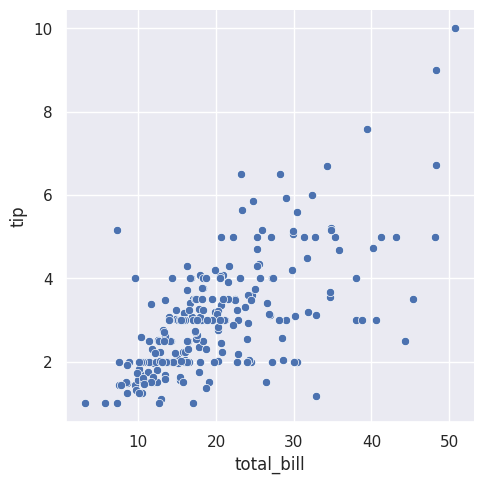

In [ ]:
# set plot
sns.relplot(data=tips, x="total_bill", y="tip")

Bien que les points soient représentés en deux dimensions, une autre dimension peut être ajoutée au tracé en les colorant selon une troisième variable.

Dans Seaborn, on parle d'utilisation d'une "*sémantique de teinte*" (*hue semantic*), car la couleur du point acquiert une signification.

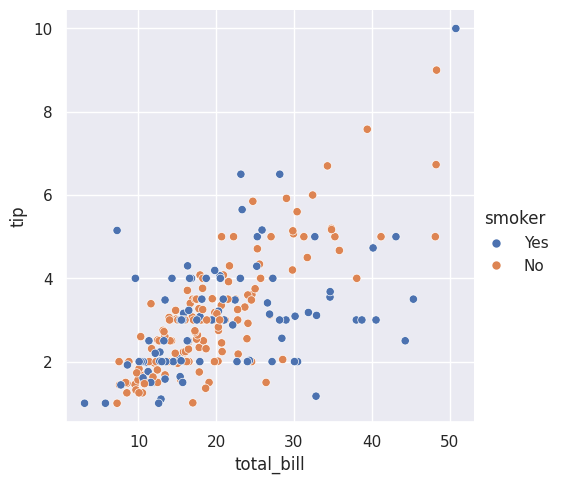

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

Pour souligner la différence entre les classes et améliorer l'accessibilité, vous pouvez utiliser un style de marqueur différent pour chaque classe.

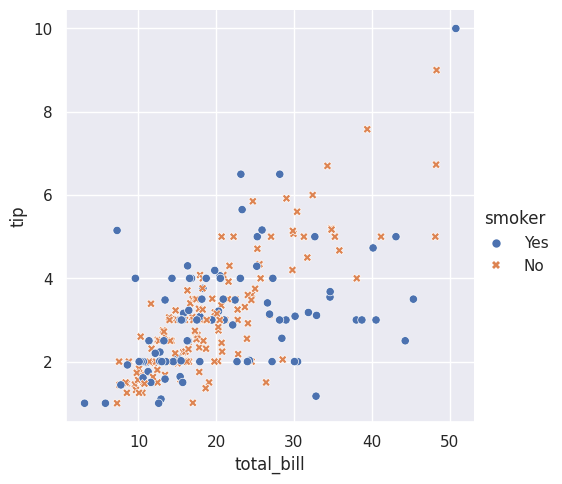

In [ ]:
sns.relplot(
   data=tips,
   x="total_bill", y="tip", hue="smoker", style="smoker"
)

Il est également possible de représenter quatre variables en modifiant la teinte et le style de chaque point indépendamment. Mais cette opération doit être effectuée avec précaution, car l'œil est beaucoup moins sensible à la forme qu'à la couleur.

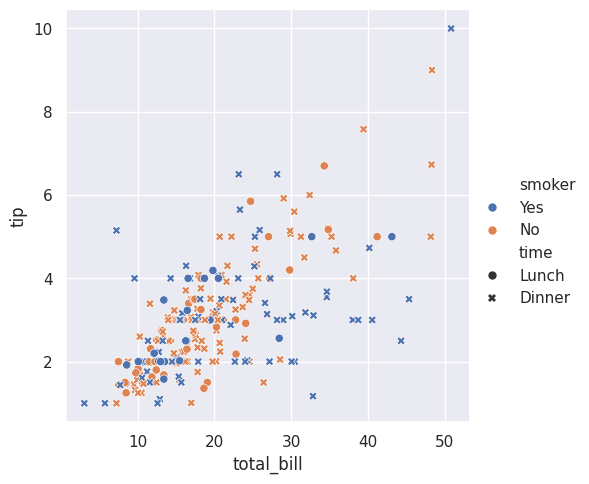

In [ ]:
sns.relplot(
   data=tips,
   x="total_bill", y="tip", hue="smoker", style="time"
)

Dans les exemples ci-dessus, la sémantique de la teinte était catégorique; la palette qualitative par défaut a donc été appliquée.

Si la sémantique de la teinte est numérique (plus précisément, si elle peut être convertie en `float`), la coloration par défaut passe à une palette séquentielle.

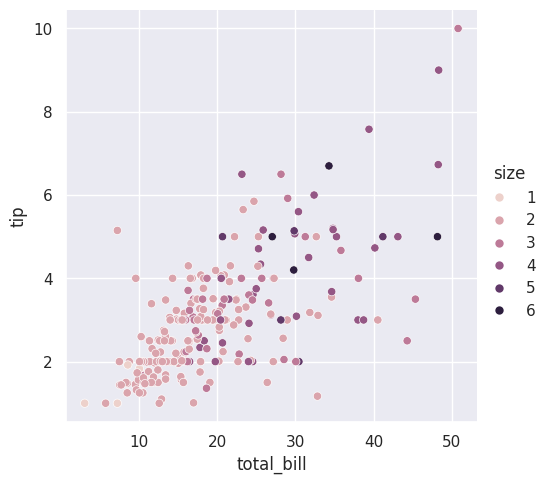

In [ ]:
sns.relplot(
  data=tips, x="total_bill", y="tip", hue="size"
)

Un autre type de variable sémantique modifie la taille de chaque point.

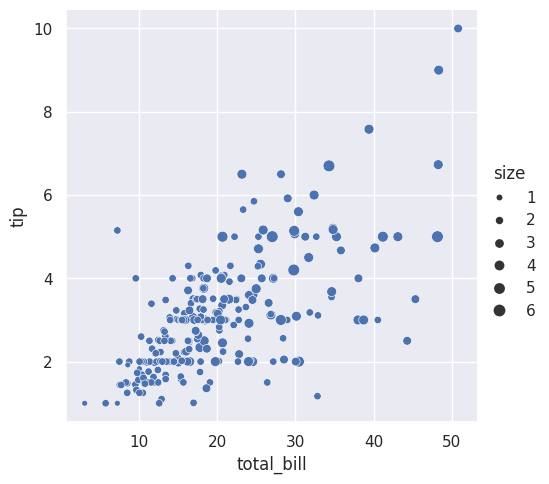

In [ ]:
sns.relplot(
  data=tips, x="total_bill", y="tip", size="size"
)

# Accentuer la continuité avec les tracés linéaires

Avec certains datasets, vous souhaiterez peut-être comprendre l'évolution d'une variable en fonction du temps, ou d'une variable continue similaire.

Dans ce cas, tracer un tracé linéaire est une bonne solution.

Dans Seaborn, cela peut être réalisé avec la fonction `lineplot()`, soit directement, soit avec `relplot()` en définissant `kind="line"`.

Dans ce qui suit, nous utiliserons l'ensemble de données intégré de Seaborn appelé  `dowjones`.

Le dataset `dowjones` est un bloc de données contenant 649 lignes et deux variables représentant la date et le prix.

In [ ]:
# load dataframe
dowjones = sns.load_dataset('dowjones')

# return first rows of dataframe
print(dowjones.head())

        Date  Price
0 1914-12-01  55.00
1 1915-01-01  56.55
2 1915-02-01  56.00
3 1915-03-01  58.30
4 1915-04-01  66.45


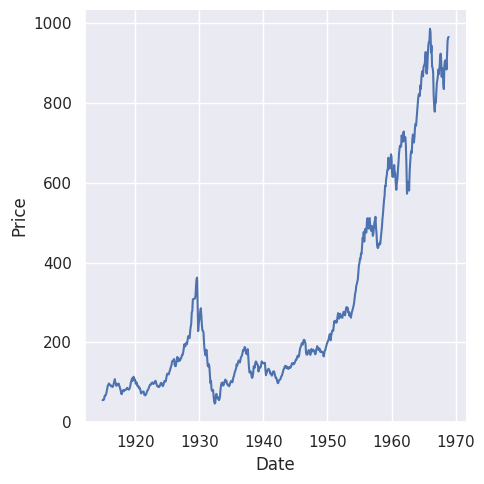

In [ ]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

## Agrégation et représentation de l'incertitude

Dans ce qui suit, nous utiliserons le jeu de données intégré de Seaborn appelé `fmri`.

Le dataset `fmri` contient des données d'imagerie par résonance magnétique fonctionnelle (functional magnetic resonance imaging: fMRI) issues d'une expérience où les participants ont effectué une tâche de mémoire de travail. Il comprend des mesures de l'activité cérébrale au fil du temps pour différentes régions d'intérêt.

Le dataset `fmri` est un bloc de données de 1064 lignes et 5 variables.

In [ ]:
# load dataframe
fmri = sns.load_dataset('fmri')

# return first rows of dataframe
print(fmri.head())

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


Les datasets plus complexes comporteront plusieurs mesures pour la même valeur de la variable `x`.

Le comportement par défaut de Seaborn consiste à agréger les mesures multiples pour chaque valeur `x` en traçant la moyenne et l'intervalle de confiance à 95% autour de la moyenne:

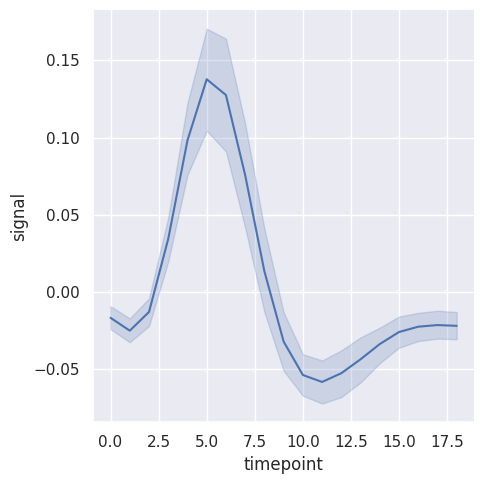

In [ ]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

Les intervalles de confiance sont calculés par bootstrapping, ce qui peut être chronophage (time-intensive) pour les datasets volumineux.

Il est donc possible de les désactiver.

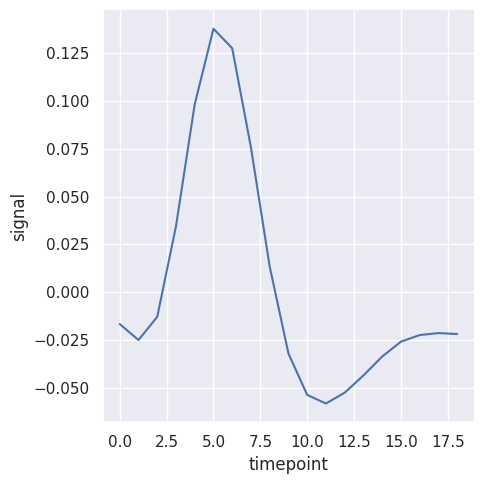

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

Une autre bonne option, en particulier avec des données plus volumineuses, consiste à représenter la propagation de la distribution à chaque instant en traçant l’écart type au lieu d’un intervalle de confiance.

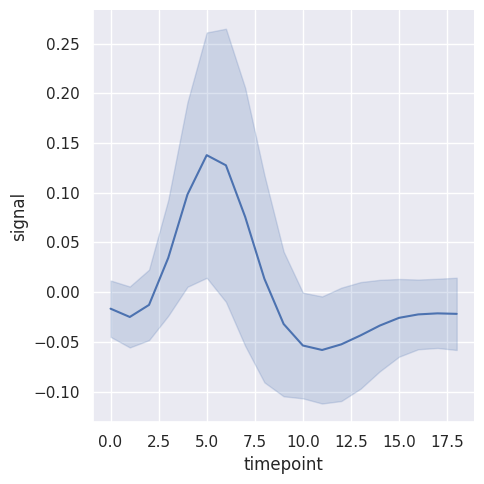

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

## Représentation graphique de sous-ensembles de données avec des correspondances sémantiques

La fonction `lineplot()` offre la même flexibilité que `scatterplot()`: elle permet d'afficher jusqu'à trois variables supplémentaires en modifiant la teinte (`hue`), la taille (`size`) et le style (`style`) des éléments du graphique.

Elle utilise la même API que `scatterplot()`, ce qui évite de se soucier des paramètres qui contrôlent l'apparence des lignes et des points dans matplotlib.

L'utilisation de la sémantique dans `lineplot()` détermine également la manière dont les données sont agrégées.

Par exemple, l'ajout d'une sémantique de teinte (`hue`) à deux niveaux divise le graphique en deux lignes et bandes d'erreur, chacune étant colorée pour indiquer à quel sous-ensemble de données elle correspond.

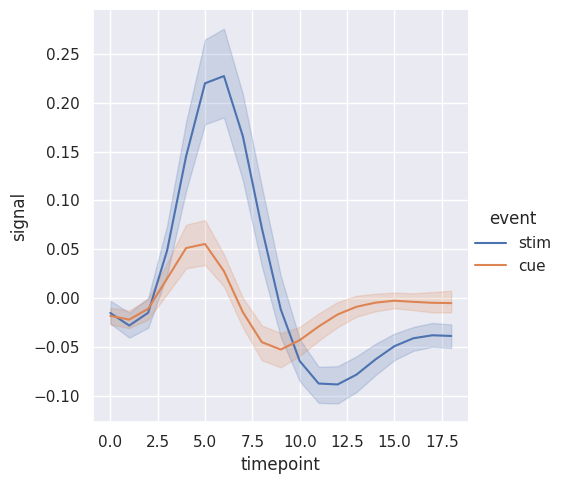

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

L'ajout d'une sémantique de style (`style`) à un tracé de ligne modifie le modèle de tirets dans la ligne par défaut.

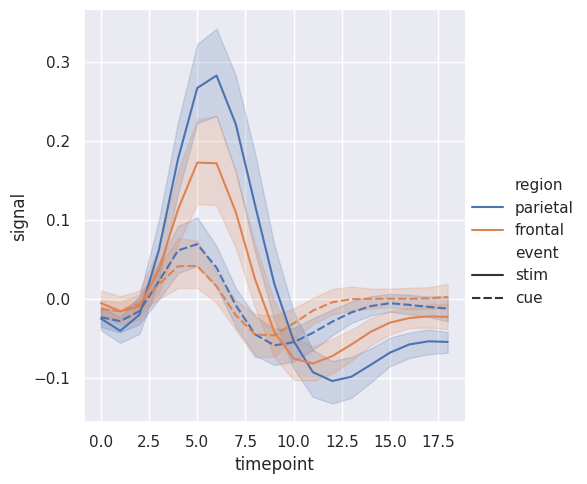

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

Mais vous pouvez identifier les sous-ensembles par les marqueurs utilisés à chaque observation, soit avec les tirets, soit à leur place.

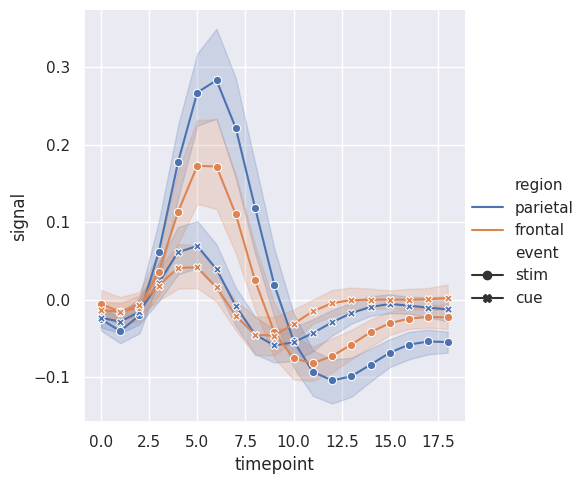

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

Lorsque vous travaillez avec des données à mesures répétées (c'est-à-dire des unités échantillonnées plusieurs fois), vous pouvez également représenter chaque unité d'échantillonnage séparément sans les distinguer par leur sémantique. Cela évite d'encombrer la légende.

Pour désactiver l'agrégation, définissez le paramètre `estimator` sur `None`.

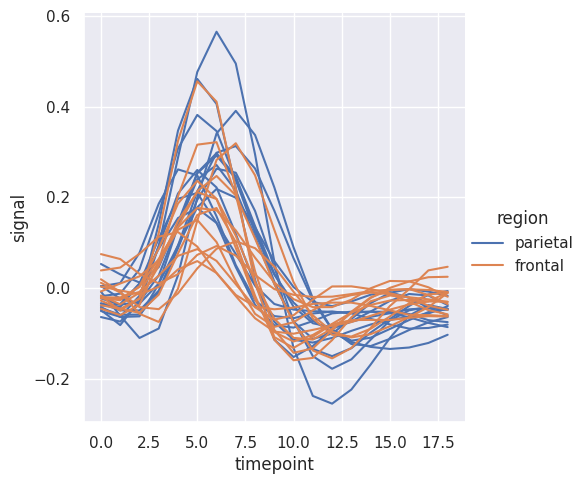

In [ ]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

# Afficher plusieurs relations avec des facettes

Bien que la fonction `relplot()` puisse afficher plusieurs variables sémantiques simultanément, cette méthode n'est pas toujours efficace.

Mais qu'en est-il lorsque vous souhaitez comprendre comment une relation entre deux variables dépend de plusieurs autres?

La meilleure approche consiste peut-être à créer plusieurs graphiques.

Comme `relplot()` est basé sur la fonction `FacetGrid`, c'est facile à réaliser.

Pour montrer l'influence d'une variable supplémentaire, au lieu de l'affecter à l'un des rôles sémantiques du graphique, utilisez-la pour "facetter" la visualisation.

Cela signifie que vous créez plusieurs axes et que vous tracez des sous-ensembles de données sur chacun d'eux.

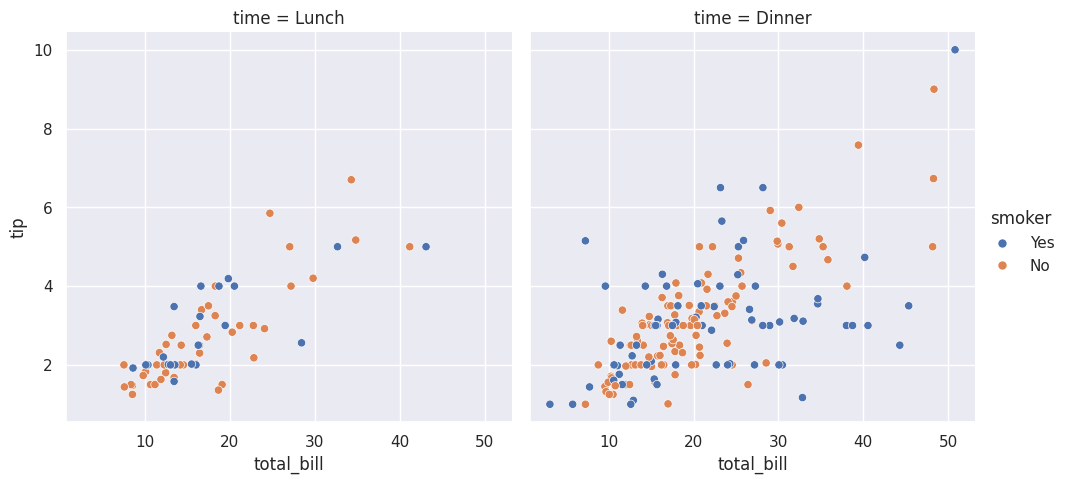

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

Vous pouvez également afficher l'influence de deux variables de cette manière: l'une en facettant les colonnes, l'autre en facettant les lignes.

À mesure que vous ajoutez des variables à la grille, vous souhaiterez peut-être réduire la taille de la figure.

N'oubliez pas que la taille de `FacetGrid` est paramétrée par la hauteur et le rapport hauteur/largeur de *chaque facette*.

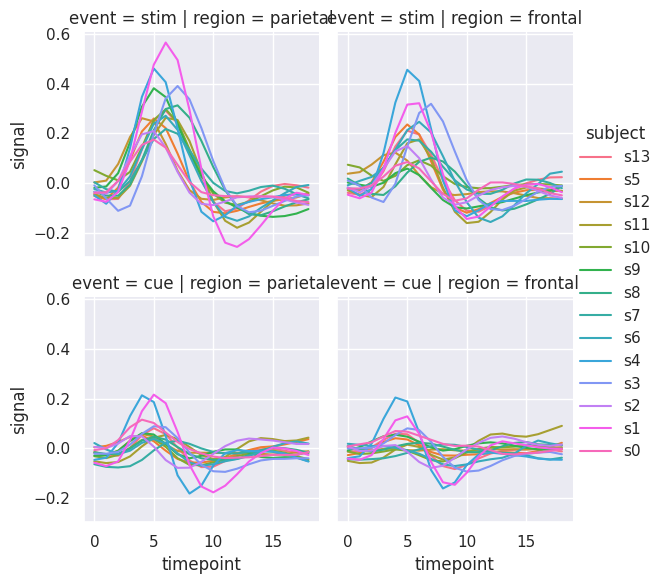

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

Lorsque vous souhaitez examiner les effets sur plusieurs niveaux d'une variable, il peut être judicieux de facetter cette variable sur les colonnes, puis "encapsuler" (wrap) les facettes dans les lignes.

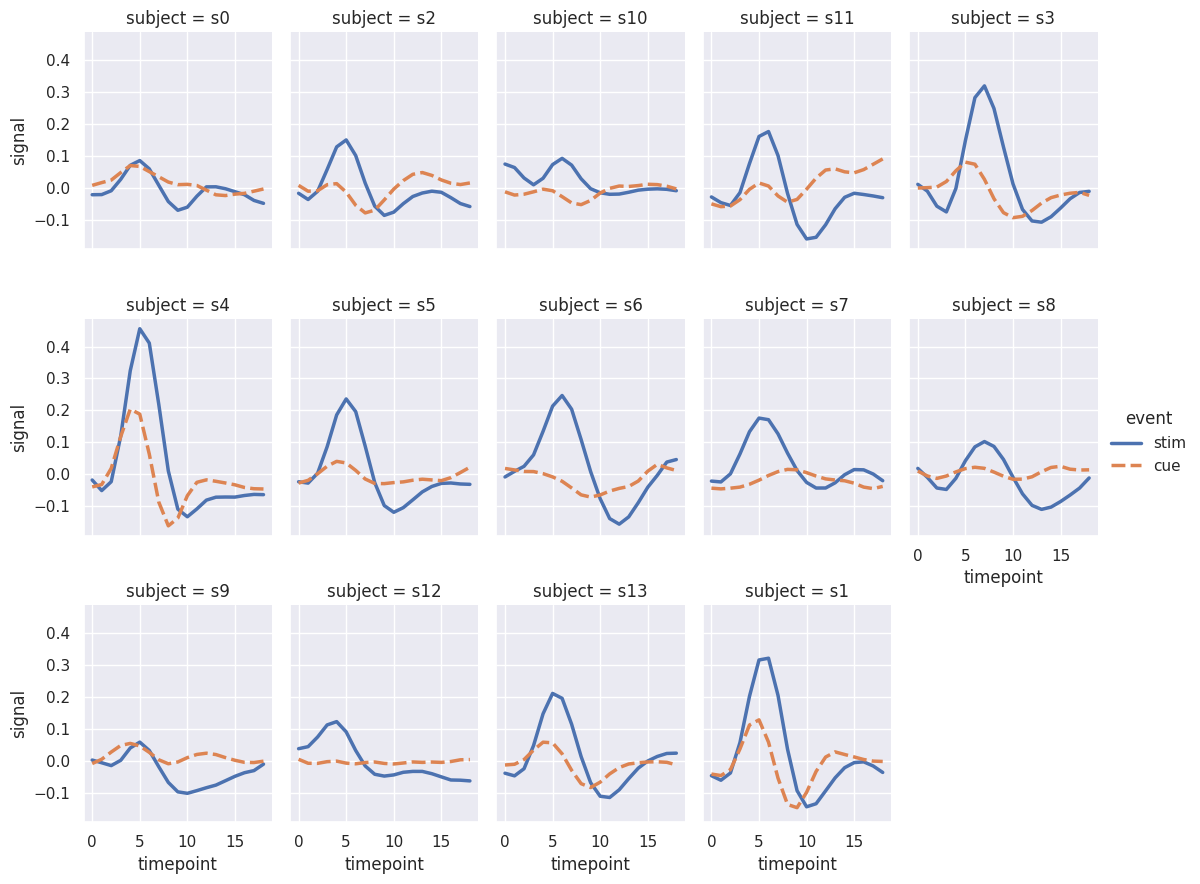

In [ ]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)

Ces visualisations, parfois appelées graphiques en treillis (lattice) ou en petits multiples (small-multiples), sont très efficaces car elles présentent les données dans un format qui permet de détecter facilement les tendances générales et les écarts par rapport à ces tendances.

Bien que vous deviez exploiter la flexibilité offerte par `scatterplot()` et `relplot()`, gardez toujours à l'esprit que plusieurs graphiques simples sont généralement plus efficaces qu'un seul graphique complexe.